# Name data analysis

Here I'll be performing EDA on the name dataset generated by Faker module.

This is a binary classification problem of determining if a name is of a Japanese origin or not. 
Therefore I'll start with analyzing Japanese names, 

## Japanese Names

### Full name

How many unique names are in a dataset.(`jp_name.csv`)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
jp_name = pd.read_csv('data/jp_names.csv')
print(jp_name.head())
print("# of unique full names in whole dataset: ", len(jp_name.name.unique()))
print('number of data points: ', jp_name.shape[0])

    code    name
0  jp_JP  青山 あすか
1  jp_JP  西之園 修平
2  jp_JP   三宅 裕樹
3  jp_JP   喜嶋 直子
4  jp_JP   加納 桃子
# of unique full names in whole dataset:  2601
number of data points:  100000


Only 2.6% of the whole dataset is consists of unique name. No wonder the model was performing amazing with test data, 
because test data would contain names that are exactly the same.

### First and Last name

Now tokenizing the name into first and last.

In [3]:
jp_name['first'] = jp_name['name'].str.split(" ").str[1]
jp_name['last'] = jp_name['name'].str.split(" ").str[0]
jp_name.head()

code    name first last
0  jp_JP  青山 あすか   あすか   青山
1  jp_JP  西之園 修平    修平  西之園
2  jp_JP   三宅 裕樹    裕樹   三宅
3  jp_JP   喜嶋 直子    直子   喜嶋
4  jp_JP   加納 桃子    桃子   加納

### Unique first and last names

In [4]:
first_names = jp_name['first'].unique() 
last_names = jp_name['last'].unique() 

print('first names: , total {}\n'.format(len(first_names)), first_names)
print('\nlast names: , total {}\n'.format(len(last_names)), last_names)

first names: , total 51
 ['あすか' '修平' '裕樹' '直子' '桃子' '春香' '京助' '治' '明美' '翼' '知実' '舞' '直人' '稔' '香織'
 '美加子' '太郎' '千代' '零' '智也' '太一' '七夏' '翔太' '聡太郎' '花子' '健一' '英樹' '裕美子' '結衣'
 '真綾' '学' '加奈' '和也' 'くみ子' '充' '陽子' '直樹' '幹' '里佳' '浩' '亮介' '裕太' '康弘' '洋介'
 '晃' '涼平' '拓真' '陽一' '淳' 'さゆり' '篤司']

last names: , total 51
 ['青山' '西之園' '三宅' '喜嶋' '加納' '村山' '山田' '江古田' '大垣' '加藤' '田辺' '鈴木' '井高' '桐山'
 '伊藤' '廣川' '青田' '中津川' '原田' '木村' '渚' '小林' '渡辺' '松本' '藤本' '宮沢' '小泉' '笹田'
 '田中' '佐々木' '浜田' '坂本' '山岸' '野村' '津田' '石田' '山本' '吉本' '近藤' '吉田' '高橋' '斉藤'
 '中島' '宇野' '中村' '山口' '井上' '若松' '工藤' '杉山' '佐藤']


## Insights 

Comparing to the total number of names in the dataset ( 100000) this is rediculously small numbers of unique last and first names. 

This means that vast majority of the Japanese names in the dataset are duplicates, which explains the high testing set accuracy (testing set is devided from the faker generated dataset), as well as the model's inability to generalize to unseen names.


I'm assuming that the sklearn's CountVectorizer is tokenizing the names into first and last name based on the whitespace (**Check if this is correct**).

With Naive Bayes, it's meaningless to train the model with duplicates names IF numbers of unique names are limited and small. <br>


**Important**
Just have to make sure that the dataset includes top 90% most frequent Last and First Japanese names(don't have to be dataset of names, but can be a dictionary of names/name list)

**Unseen Names**<br>
Dealing with unseen names, 
1. recognize if it is unseen name, if so, proceed
2. add to Japanese / Foregin namelist according to correct answer
    * Human intervention needed here?
    
**異なる字体**

Same kanji has different representation sometimes, causing it to be counted as couple names when they're the same name. 
> For e.g.
斎藤、斉藤、齊藤、齋藤

* possible solution is to use `CountVectorizer()`'s  `strip_accents:{ascii, unicode, None}` option to normalize character. 

## data collection

### Japanese

#### Free

**Last Name**
* Scrape Last names [here](https://myoji-yurai.net/prefectureRanking.htm;jsessionid=C13440C475D5A9E10ACD0C8C63AF6E6C.jvm1) **<-DONE, located at 'data/last_names.csv'**

**First Name**

- [Meiji Yasuda Insurance](https://www.meijiyasuda.co.jp/sp/enjoy/ranking/index.html#/year/2018n/9)
This one's list of newer weird first names. 

- [yearly popular name ranking](http://www.tonsuke.com/nebin.html)
Yearly one, based on the Yasuda Insurance Data

- [fb-serach-results](https://github.com/rrva/fb-search-results)
> Done by writing python script with selenium, ran on separate ipython instance to run "parallel", Selenium does not support multiprocessing.
Since the search result uses infinete scrolling page, the script incorporated automated scrolling. Also detection for CAPTCHA and the end of the search result were implemented.
`fb_names.py`


**accurate full names**
- [総務省　選挙登録者名簿](http://www.soumu.go.jp/senkyo/senkyo_s/news/senkyo/meibo_etsuran/index.html)



**Kanji**
- [人名、常用漢字一覧表](https://kanji.jitenon.jp/cat/jimmei.html)



#### Paid Solutions

- [NDICS (姓名辞書)](http://www.metro.co.jp/products/datacontents/ndics/)

### Non-Japanese

- [**National Archives mail and phone directory**](https://www.archives.gov/research/alic/reference/mail-and-telephone-directories.html)
- [U of Rutgers Phone and Address directory](https://libguides.rutgers.edu/directories)


## Last Name Distribution

From the insights above, I've decided to take a look at distributions of various last names, in order to determine the number of last names to be included in training dataset, which would cover 95% of the whole Japanese population.

Last name distribution data was scraped from [全国名字ランキング](https://myoji-yurai.net/prefectureRanking.htm;jsessionid=C13440C475D5A9E10ACD0C8C63AF6E6C.jvm1), let's visualize it.

Data looks like this.

In [5]:
names = pd.read_csv('data/last_names.csv')
names.head(10)

ranking last_name  population     ratio  cumpercentage
0        1        佐藤     1880000  0.021421       1.512868
1        2        鈴木     1802000  0.020532       2.962969
2        3        高橋     1416000  0.016134       4.102449
3        4        田中     1340000  0.015268       5.180770
4        5        伊藤     1078000  0.012283       6.048255
5        6        渡辺     1067000  0.012158       6.906888
6        7        山本     1054000  0.012009       7.755060
7        8        中村     1048000  0.011941       8.598404
8        9        小林     1031000  0.011747       9.428067
9       10        加藤      890000  0.010141      10.144266

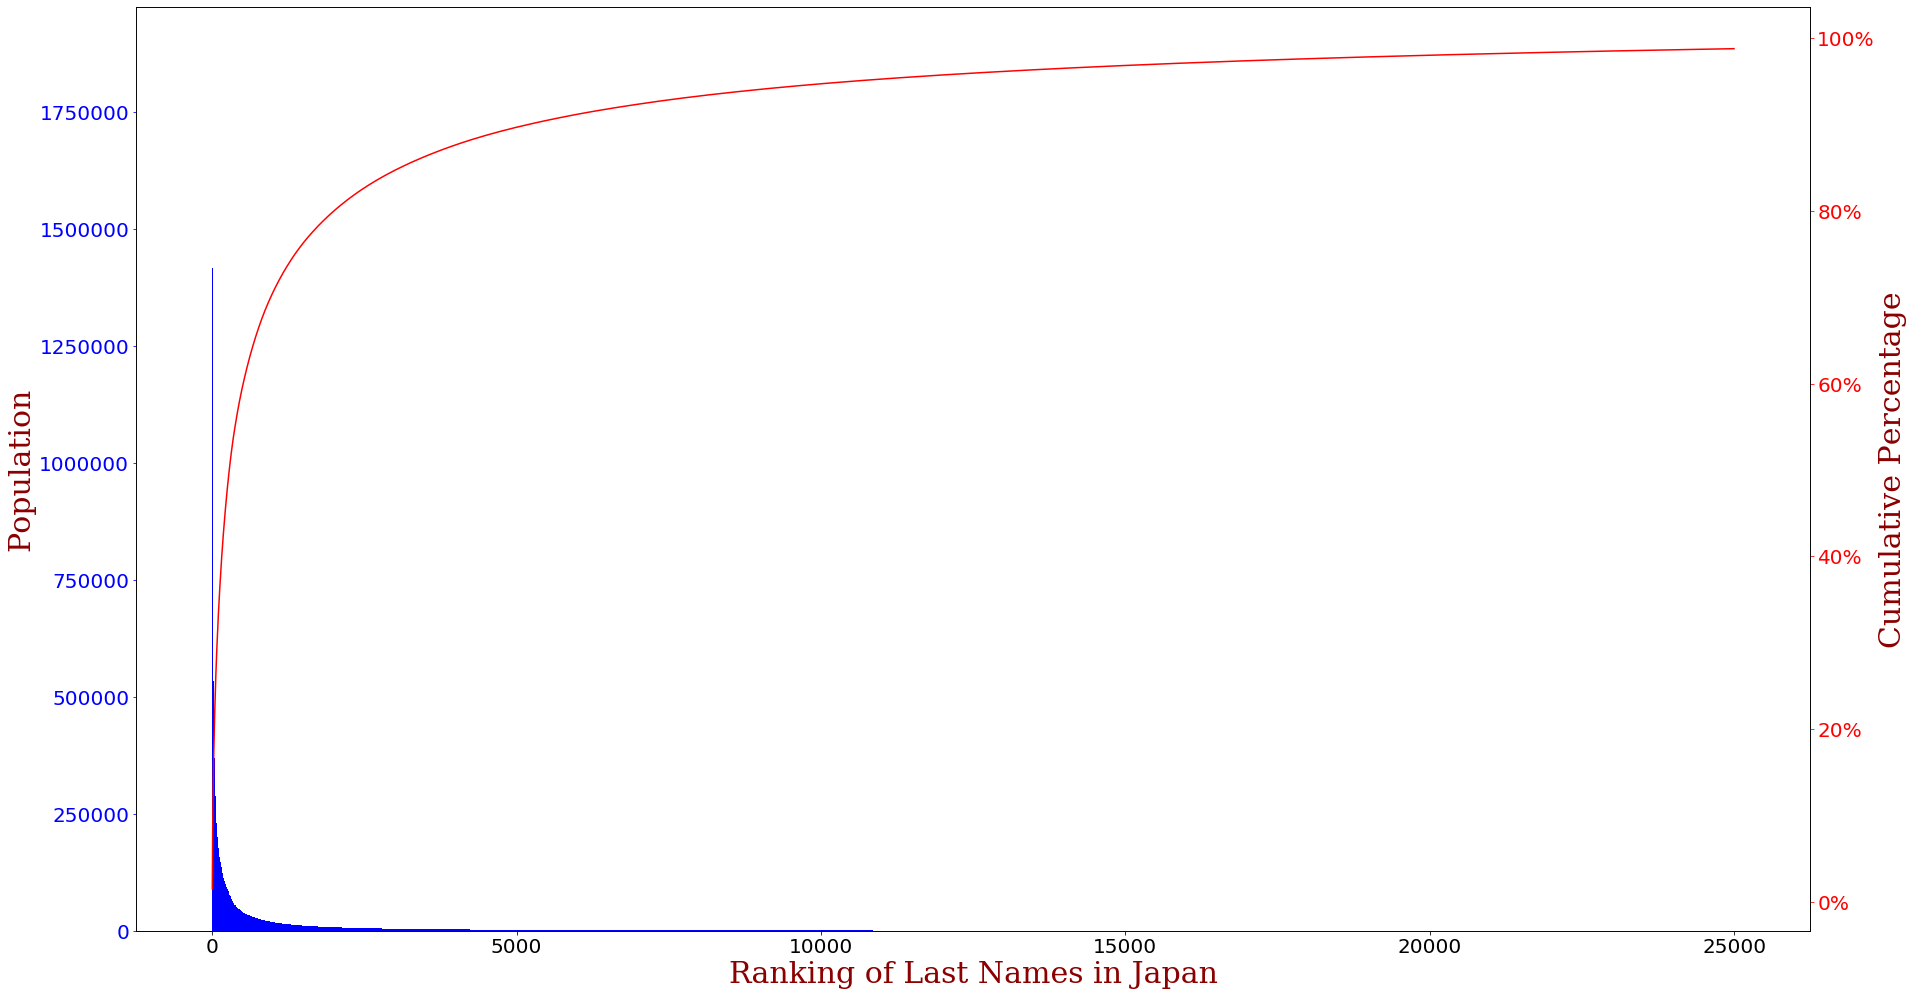

In [6]:
# now plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df = names.head(25000)

fig, ax = plt.subplots(figsize=(30, 17))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30
        }
ax.bar(df.ranking, df.population, color='b', width=1.0)
ax2 = ax.twinx() # create new ax instance with separate y ticker on the other side
ax2.plot(df.cumpercentage, color='r')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors='b', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', colors='r', labelsize=20)

ax.set_xlabel("Ranking of Last Names in Japan", fontdict=font)
ax.set_ylabel("Population", fontdict=font)
ax2.set_ylabel("Cumulative Percentage", fontdict=font)

plt.show()

Out of all 40000 names from the dataset, you can see that half of that 20000 names will cover more than 90% of the population.

We can add this top 20000 last names into the source code of Faker library, so that generated data covers these names.

In [ ]:
## now plotting a simple hist
#ax = sns.countplot(x='last_name', data=names[['last_name', 'population']])
#ax = sns.lineplot(x=np.linspace(1,40000, 40000), y='population', data=names)
ax = sns.barplot(x='rank', y='population', data=names)

## First Name

### Meiji Yasuda Insurance Website
First name list was collected from the Meiji Yasuda Insurance website, which include list of top 10 ~ 90 given names (depends on year) born between 2000 ~ 2018. 

Might collect more from other sources? maybe. 

Let's take a look.

In [16]:
# load in the file as df
first = pd.read_csv('data/first_names.tsv', sep='\t')
first.head(10)

ranking fname  population  ratio
0        1     蓮        35.0   0.72
1        2    颯太        30.0   0.62
2        3    翔太        24.0   0.49
3        4    拓海        24.0   0.49
4        5    大翔        22.0   0.45
5        6     颯        21.0   0.43
6        7     翔        20.0   0.41
7        8    優斗        20.0   0.41
8        9     陸        20.0   0.41
9       10     翼        19.0   0.39

In [13]:
# now display total numbers of the records and how many unique names are included
print('numbers of records: ', first['fname'].shape)
print('numbers of unique first names in the records: ', len(first['fname'].unique()))

numbers of records:  (3545,)
numbers of unique first names in the records:  853


As you can see, out of 3545 records, there are only 835 unique first names. Definetly need more data for first names.

### Facebook 

Facebook's name data analysis is on other notebook